**PROJECT TITLE :** WEATHER IMAGE CLASSIFICATION USING CNN

**PROBELM STATEMENT**

**DOMAIN :** Machine Learning and Deep Learning.

**DATA DESCRIPTION :** This project involves classifying weather images using deep learning techniques, CNN, Transfer Learning. Images were resized to 224x224 pixels, converted to numerical arrays, and processed with CNNs (VGG, ResNet, MobileNet).Evaluation metrics include accuracy, precision, recall, and F1-score, highlighting performance and insights gained from classification efforts.

**DATA :** Each image in the dataset is resized to a 224x224x3 array format, representing height, width, and color channels (RGB).

**PROJECT OBJECTIVE :** The project aims to leverage different models to achieve high classification performance, focusing on accuracy, precision, recall, and F1-score as key evaluation metrics.

#### Importing the libraries

In [5]:
#Mathematical Packages.
import numpy as np
import pandas as pd

#Data Exploratory libraries.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Filtering the Warnings
import warnings
warnings.filterwarnings('ignore')

#Image reading and reshaping.
import os
from PIL import Image

#Data Preprocessing.
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#DeepLearning packages.
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, InputLayer, Dropout, Flatten, BatchNormalization
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, DenseNet121, MobileNet,EfficientNetB0,InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import time

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

np.random.seed(42)
tf.random.set_seed(42)

print("Libraries are imported successfully.")

Libraries are imported successfully.


In [6]:
#Checking for the GPU availability.
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 1


### Data Loading and Reshaping.

In [8]:
# Define the path to the directory containing image folders
base_folder = '/kaggle/input/image-data'
folders = ['cloudy', 'rainy', 'shine', 'sunrise']

# Function to resize images and convert to numpy arrays
def resize_and_convert(image_path):
    try:
        with Image.open(image_path) as img:
            # Resize image to 224x224 pixels
            resized_img = img.resize((224, 224))
            # Convert image to numpy array of shape (224, 224, 3)
            img_array = np.asarray(resized_img)
            if img_array.shape == (224, 224, 3):
                return img_array
            else:
                return None
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Initializing an empty dictionary to store image arrays for each folder.
image_arrays = {}

# Initializing an empty list to store labels.
labels = []

# Process each folder
for folder in folders:
    folder_path = os.path.join(base_folder, folder)
    files = os.listdir(folder_path)
    
    # Initializing a list to store image arrays for the current folder
    folder_images = []
    # Initializing a list to store corresponding labels for the current folder
    folder_labels = []
    
    # Processing each image file in the folder
    for file in files:
        image_path = os.path.join(folder_path, file)
        img_array = resize_and_convert(image_path)
        
        if img_array is not None:
            folder_images.append(img_array)
            if folder == 'cloudy':
                folder_labels.append('Cloudy')
            elif folder == 'rainy':
                folder_labels.append('Rainy')
            elif folder == 'shine':
                folder_labels.append('Shine')
            elif folder == 'sunrise':
                folder_labels.append('Sunrise')
    
    image_arrays[folder] = np.array(folder_images)
    
    labels.extend(folder_labels)
    
    print(f"Processed {len(folder_images)} images from {folder}.")
          
print('\n')          
for folder, arr in image_arrays.items():
    print(f"Shape of {folder} array: {arr.shape}")

print(f"\nLength of labels list: {len(labels)}")


Processed 298 images from cloudy.
Processed 214 images from rainy.
Processed 251 images from shine.
Processed 356 images from sunrise.


Shape of cloudy array: (298, 224, 224, 3)
Shape of rainy array: (214, 224, 224, 3)
Shape of shine array: (251, 224, 224, 3)
Shape of sunrise array: (356, 224, 224, 3)

Length of labels list: 1119


### Data Pre-processing.

#### Image printing

In [9]:
#Function to print first 10 images along with their labels.
def print_images(Type, label, labels_list = None):
    #If it is a single label.
    if labels_list == None:
        plt.figure(figsize=(15, 15))
        num_images = min(len(Type), 10)
        for i in range(num_images):
            plt.subplot(1, 10, i + 1)
            plt.imshow(Type[i])
            plt.title(label)
            plt.axis('off')
        plt.show()
    else:            #If it is a list of labels.
        plt.figure(figsize=(15, 15))
        num_images = min(len(Type), 10)
        for i in range(num_images):
            plt.subplot(1, 10, i + 1)
            plt.imshow(Type[i])
            plt.title(labels_list[i])
            plt.axis('off')
        plt.show()

cloudy Images : 


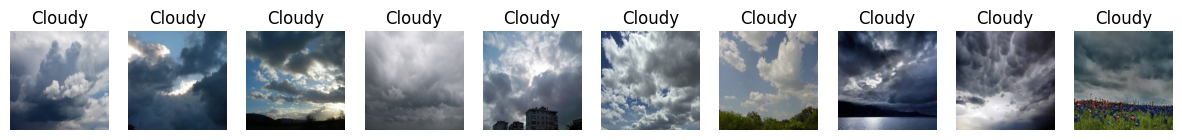

rainy Images : 


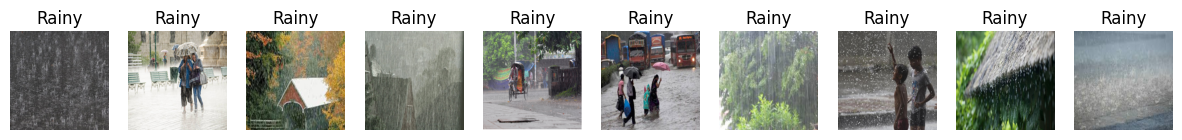

shine Images : 


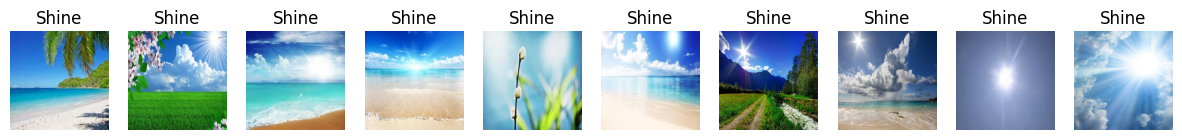

sunrise Images : 


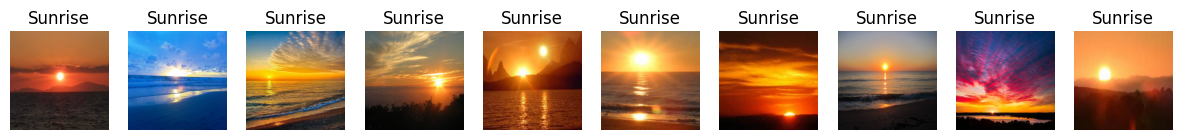

In [12]:
#Printing first 10 images for all categories.
image_labels = ['Cloudy', 'Rainy', 'Shine', 'Sunrise']
for j, i in zip(range(len(image_labels)),image_arrays.keys()):
    print(f"{i} Images : ")
    print_images(image_arrays[i], (image_labels[j]))

#### Combining the data

In [13]:
#Combining all the image arrays into a single array.
combined_data = np.concatenate((image_arrays['cloudy'], image_arrays['rainy'], image_arrays['shine'], image_arrays['sunrise']))
print(f"Combined data shape : {combined_data.shape}")

Combined data shape : (1119, 224, 224, 3)


#### Spilitting the data.

In [16]:
#Splitting the data into three sets(Trianing, Testing and Validation).
X_train, X_temp, y_train, y_temp = train_test_split(combined_data, labels, test_size = 0.40, shuffle = True, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.50, shuffle = True, random_state = 42)

#Printing each set shape.
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"X_vaL shape : {X_val.shape}")

X_train shape : (671, 224, 224, 3)
X_test shape : (224, 224, 224, 3)
X_vaL shape : (224, 224, 224, 3)


- X_train dataset has 671 images and X_test, X_val datasets have 224 images.

X_train shuffled images : 


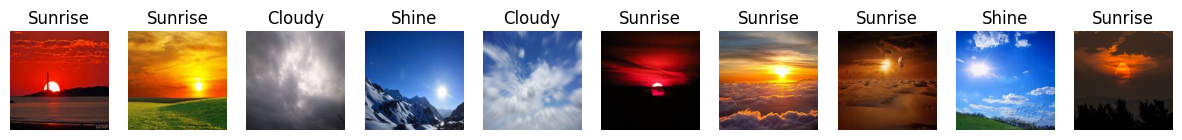

X_test shuffled images : 


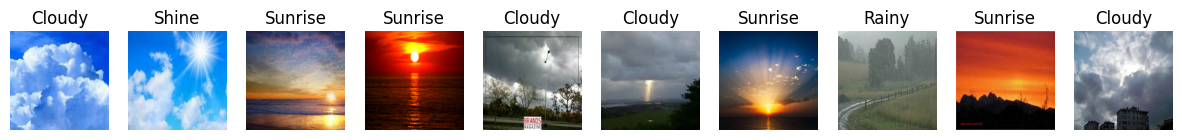

X_val shuffled images : 


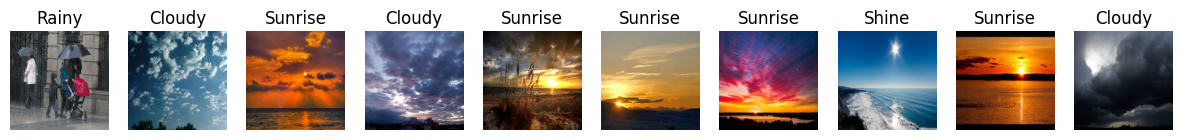

In [17]:
#Printing first 10 images for traing, testing and validation(Shuffled Images).
print("X_train shuffled images : ")
print_images(X_train,None, y_train)
print("X_test shuffled images : ")
print_images(X_test,None, y_test)
print("X_val shuffled images : ")
print_images(X_val,None, y_val)

In [18]:
X_train[:1]

array([[[[125,  31,  32],
         [123,  31,  32],
         [123,  31,  34],
         ...,
         [132,  35,  19],
         [132,  35,  19],
         [132,  35,  19]],

        [[125,  31,  32],
         [124,  31,  32],
         [123,  31,  33],
         ...,
         [132,  35,  19],
         [132,  35,  19],
         [132,  35,  19]],

        [[125,  31,  31],
         [125,  31,  31],
         [123,  31,  32],
         ...,
         [132,  35,  19],
         [132,  35,  19],
         [132,  35,  19]],

        ...,

        [[  4,   2,   3],
         [  4,   2,   3],
         [  4,   2,   3],
         ...,
         [  0,   0,   4],
         [  0,   1,   6],
         [  0,   1,   6]],

        [[  4,   2,   3],
         [  4,   2,   3],
         [  4,   2,   3],
         ...,
         [  0,   1,   5],
         [  0,   2,   7],
         [  0,   2,   7]],

        [[  4,   2,   3],
         [  4,   2,   3],
         [  4,   2,   3],
         ...,
         [  0,   3,   6],
        

#### Data Scaling

In [19]:
#Input data scaling.
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
X_val_scaled = X_val/255.0

In [20]:
#Printing first input image array of X_train.
X_train_scaled[0:1]

array([[[[0.49019608, 0.12156863, 0.1254902 ],
         [0.48235294, 0.12156863, 0.1254902 ],
         [0.48235294, 0.12156863, 0.13333333],
         ...,
         [0.51764706, 0.1372549 , 0.0745098 ],
         [0.51764706, 0.1372549 , 0.0745098 ],
         [0.51764706, 0.1372549 , 0.0745098 ]],

        [[0.49019608, 0.12156863, 0.1254902 ],
         [0.48627451, 0.12156863, 0.1254902 ],
         [0.48235294, 0.12156863, 0.12941176],
         ...,
         [0.51764706, 0.1372549 , 0.0745098 ],
         [0.51764706, 0.1372549 , 0.0745098 ],
         [0.51764706, 0.1372549 , 0.0745098 ]],

        [[0.49019608, 0.12156863, 0.12156863],
         [0.49019608, 0.12156863, 0.12156863],
         [0.48235294, 0.12156863, 0.1254902 ],
         ...,
         [0.51764706, 0.1372549 , 0.0745098 ],
         [0.51764706, 0.1372549 , 0.0745098 ],
         [0.51764706, 0.1372549 , 0.0745098 ]],

        ...,

        [[0.01568627, 0.00784314, 0.01176471],
         [0.01568627, 0.00784314, 0.01176471]

#### Label Encoding.

In [21]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_val_encoded = encoder.transform(y_val)

y_train_encoded[0:5]

array([3, 3, 0, 2, 0])

In [22]:
# Checking for the labels given by encoder.
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("\nLabel mapping:", label_mapping)


Label mapping: {'Cloudy': 0, 'Rainy': 1, 'Shine': 2, 'Sunrise': 3}


#### One_Hot encoding the labels.

In [23]:
#One-hot Encoding.
y_train_labeled = to_categorical(y_train_encoded, num_classes = 4)
y_test_labeled = to_categorical(y_test_encoded, num_classes = 4)
y_val_labeled = to_categorical(y_val_encoded, num_classes = 4)

print(f"Encoded y_train :\n {y_train_labeled[0:5]}\n")
print(f"Encoded y_test :\n {y_test_labeled[0:5]}")

Encoded y_train :
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

Encoded y_test :
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [24]:
#Function to print confusion of training and testing.
def print_confusionMatrix(model, X_train, y_train, X_test, y_test):
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(classification_report(np.argmax(y_test, axis = 1), np.argmax(y_pred_test, axis = 1)))
    
    #Confusion_meatrix for trainingset.
    plt.figure(figsize = (7,3))
    plt.subplot(121)
    cm = confusion_matrix(np.argmax(y_train, axis = 1), np.argmax(y_pred_train, axis = 1))
    cm = pd.DataFrame(cm, 
                    columns = ['Actual_0', 'Actual_1', 'Actual_2', 'Actual_3'],
                    index = ['Pred_0', 'Pred_1', 'Pred_2', 'Pred_3'])
    sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
    plt.yticks(rotation = 360)
    plt.title('Training data')
    
    #Confusion_meatrix for testset.
    plt.subplot(122)
    cm = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred_test, axis = 1))
    cm = pd.DataFrame(cm, 
                    columns = ['Actual_0', 'Actual_1', 'Actual_2', 'Actual_3'])
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',yticklabels=False, cbar = False)
    plt.title('Testing Data')
    plt.tight_layout()
    plt.show()

#Function to plot distributions of accuracies over train and testing.
def plot_history(history):
    plt.figure(figsize = (5,4))
    train_accuracy = [val * 100 for val in history.history['accuracy']]
    val_accuracy = [val * 100 for val in history.history['val_accuracy']]
    
    plt.plot(train_accuracy)
    plt.plot(val_accuracy)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Number of Epochs')
    plt.yticks(range(0, 101, 10))  # Set y-axis ticks from 0 to 100 with intervals of 10
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

### Model Building

#### Building a CNN model 

In [27]:
cnn = Sequential()
cnn.add(Conv2D(256, (3,3), activation = 'relu', input_shape = (224, 224, 3), kernel_initializer = 'he_uniform'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, (3,3), activation = 'relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, (3,3), activation = 'relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dense(64, activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dense(4, activation = 'softmax'))
cnn.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,541,444 (44.03 MB)

 Trainable params: 11,541,316 (44.03 MB)

 Non-trainable params: 128 (512.00 B)

In [28]:
# Model compilization.
cnn.compile(optimizer = 'sgd',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

start_time = time.time()
history = cnn.fit(X_train_scaled, y_train_labeled, epochs = 50, validation_data = (X_val_scaled,y_val_labeled), batch_size = 32, shuffle = False)
end_time = time.time()
cnn_time = end_time- start_time

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.3000 - loss: 1.4152 - val_accuracy: 0.4286 - val_loss: 1.3698
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.3392 - loss: 1.3588 - val_accuracy: 0.3125 - val_loss: 1.2500
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.4765 - loss: 1.1462 - val_accuracy: 0.6607 - val_loss: 1.1259
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.5599 - loss: 1.0089 - val_accuracy: 0.7321 - val_loss: 0.9696
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.6186 - loss: 0.9206 - val_accuracy: 0.7009 - val_loss: 0.9233
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.6664 - loss: 0.8576 - val_accuracy: 0.4821 - val_loss: 0.9930
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.6728 - loss: 0.7952 - val_accuracy: 0.7500 - val_loss: 0.7968
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.6860 - loss: 0.7845 - val_accuracy: 0.

In [29]:
loss, test_accuracy = cnn.evaluate(X_test_scaled, y_test_labeled)
print(f"Loss : {loss}")
print(f"Accuracy : {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7499 - loss: 0.6362
Loss : 0.632820725440979
Accuracy : 0.75


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        62
           1       0.57      0.98      0.72        48
           2       0.91      0.43      0.58        47
           3       0.97      0.99      0.98        67

    accuracy                           0.75       224
   macro avg       0.78      0.74      0.72       224
weighted avg       0.79      0.75      0.74       224



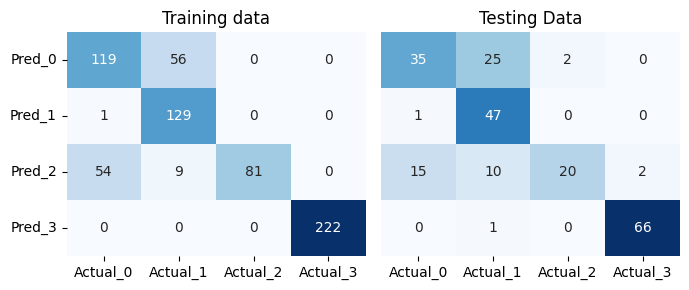

In [30]:
print_confusionMatrix(cnn, X_train_scaled, y_train_labeled, X_test_scaled, y_test_labeled)

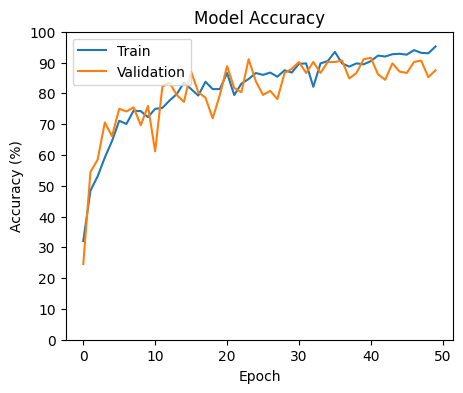

In [23]:
plot_history(history)

### Observations

- The basic CNN model is giving 94% accuracy on trainingset but 70% in validationset.
- This model is overfitting.
- Recall, F1_scores are higher for class_3[Sunrise] comparing with the other classes.

#### Using Transfer Learning Techniques to increase the model accuracies.

#### VGGNET

In [46]:
cnn_vgg = VGG16(weights = 'imagenet',
                include_top = False,
                input_shape = (224,224,3))

#Extracting only last five layers of VGG16 pre-trained model.
for layer in cnn_vgg.layers[0:-5]:
    layer.trainable = False
    
vgg_model = Sequential()
vgg_model.add(cnn_vgg)
vgg_model.add(Flatten())
vgg_model.add(Dense(4, activation='softmax'))

In [47]:
optimizer = Adam(learning_rate=0.0001)
vgg_model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

start_time = time.time()
history = vgg_model.fit(X_train_scaled, y_train_labeled,
                        epochs=25,
                        validation_data=(X_val_scaled, y_val_labeled),
                        batch_size=32, shuffle = False)
end_time = time.time()
vgg1_time = end_time- start_time

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.5815 - loss: 1.0241 - val_accuracy: 0.8750 - val_loss: 0.3606
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9679 - loss: 0.1119 - val_accuracy: 0.9420 - val_loss: 0.1613
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9959 - loss: 0.0206 - val_accuracy: 0.9420 - val_loss: 0.2206
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.9107 - val_loss: 0.2867
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9931 - loss: 0.0248 - val_accuracy: 0.9241 - val_loss: 0.2212
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9985 - loss: 0.0107 - val_accuracy: 0.8259 - val_loss: 0.7533
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9980 - loss: 0.0208 - val_accuracy: 0.9241 - val_loss: 0.1971
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9974 - loss: 0.0134 - val_accuracy: 0.9

In [48]:
vgg_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │       100,356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,174,606 (111.29 MB)

 Trainable params: 7,179,780 (27.39 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 14,359,562 (54.78 MB)

In [49]:
loss, test_accuracy = vgg_model.evaluate(X_test_scaled, y_test_labeled)
print(f"Loss : {loss}")
print(f"Accuracy : {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9485 - loss: 0.1303
Loss : 0.11817512661218643
Accuracy : 0.9553571343421936


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        62
           1       0.96      1.00      0.98        48
           2       0.91      0.91      0.91        47
           3       0.97      0.99      0.98        67

    accuracy                           0.96       224
   macro avg       0.95      0.95      0.95       224
weighted avg       0.96      0.96      0.96       224



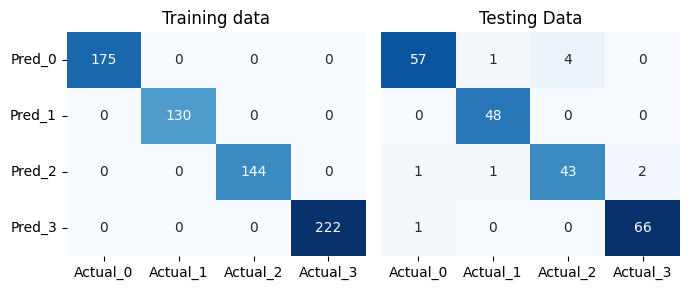

In [50]:
print_confusionMatrix(vgg_model, X_train_scaled, y_train_labeled, X_test_scaled, y_test_labeled)

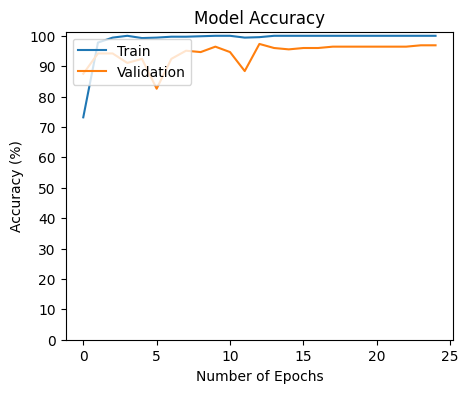

In [52]:
plot_history(history)

### Observations

- Simple VGG16 model giving 95% of accuracy on testing data but it is slightly overfitting as it is giving 100% accuracy for training set.
- Recall, F1_scores are also good for this model.

In [37]:
#Building another VGG model with some extra layers.
cnn_vgg2 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freezing layers in VGG16.
for layer in cnn_vgg2.layers[0:-3]:
    layer.trainable = False
    
vgg_model2 = Sequential()
vgg_model2.add(cnn_vgg2)
vgg_model2.add(Flatten())
vgg_model2.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
vgg_model2.add(Dense(128, activation='relu'))
vgg_model2.add(Dense(64, activation='relu'))
vgg_model2.add(Dropout(0.5))
vgg_model2.add(Dense(64, activation='relu'))
vgg_model2.add(Dense(32, activation='relu'))
vgg_model2.add(Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
vgg_model2.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

start_time = time.time()
history = vgg_model2.fit(X_train_scaled, y_train_labeled, epochs = 50, validation_data = (X_val_scaled, y_val_labeled), batch_size=32, shuffle = False)
end_time = time.time()
vgg2_time = end_time - start_time

vgg_model2.summary()

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 361ms/step - accuracy: 0.3319 - loss: 1.3790 - val_accuracy: 0.4866 - val_loss: 1.0236
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5713 - loss: 0.9352 - val_accuracy: 0.7143 - val_loss: 0.7511
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7316 - loss: 0.6530 - val_accuracy: 0.6964 - val_loss: 0.6868
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7813 - loss: 0.4956 - val_accuracy: 0.7723 - val_loss: 0.4940
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8105 - loss: 0.4646 - val_accuracy: 0.7723 - val_loss: 0.6544
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9139 - loss: 0.2277 - val_accuracy: 0.9196 - val_loss: 0.5646
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9125 - loss: 0.3760 - val_accuracy: 0.9018 - val_loss: 0.3667
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9225 - loss: 0.2380 - val_accuracy: 0.9330 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,564,846 (166.19 MB)

 Trainable params: 11,189,924 (42.69 MB)

 Non-trainable params: 9,995,072 (38.13 MB)

 Optimizer params: 22,379,850 (85.37 MB)

In [38]:
vgg_model2.evaluate(X_test_scaled, y_test_labeled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9508 - loss: 0.7228


[0.46576574444770813, 0.9553571343421936]

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        62
           1       0.96      0.96      0.96        48
           2       0.96      0.94      0.95        47
           3       0.99      0.99      0.99        67

    accuracy                           0.96       224
   macro avg       0.96      0.95      0.95       224
weighted avg       0.96      0.96      0.96       224



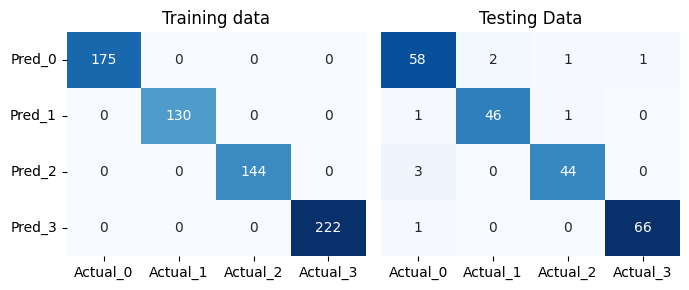

In [39]:
print_confusionMatrix(vgg_model2, X_train_scaled, y_train_labeled, X_test_scaled, y_test_labeled)

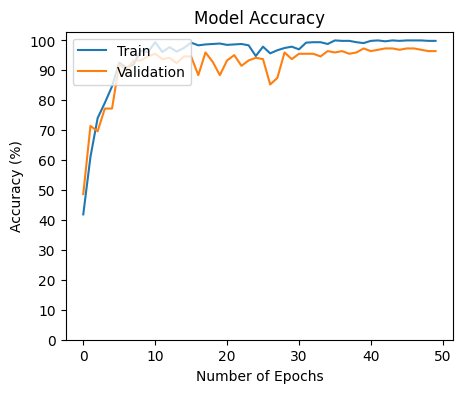

In [40]:
plot_history(history)

### Observations

- Vgg model with few more layers also working better than the base VGG model.
- This model is able to predict each class in a generalized way as it has higher scores for all classes.

### DenseNet

In [41]:
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing all layers except the last 5 layers.
for layer in densenet.layers[:-5]:
    layer.trainable = False
    
cnn_densenet = Sequential()
cnn_densenet.add(densenet)
cnn_densenet.add(Flatten())
cnn_densenet.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
cnn_densenet.add(Dropout(0.5))
cnn_densenet.add(Dense(128, activation = 'relu'))
cnn_densenet.add(Dropout(0.5))
cnn_densenet.add(Dense(64, activation = 'relu'))
cnn_densenet.add(Dense(64, activation = 'relu'))
cnn_densenet.add(BatchNormalization())
cnn_densenet.add(Dense(32, activation = 'relu'))
cnn_densenet.add(Dense(4, activation = 'softmax'))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [42]:
cnn_densenet.compile(optimizer = SGD(learning_rate = 0.001, momentum = 0.9),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

start_time = time.time()
history = cnn_densenet.fit(X_train_scaled, y_train_labeled, epochs = 25, validation_data = (X_val_scaled, y_val_labeled), batch_size=50, shuffle = False)
end_time = time.time()
dense_time = end_time - start_time

cnn_densenet.summary()

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.3402 - loss: 1.4777 - val_accuracy: 0.4866 - val_loss: 1.2518
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3793 - loss: 1.3955 - val_accuracy: 0.6071 - val_loss: 1.1482
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.4635 - loss: 1.2292 - val_accuracy: 0.5938 - val_loss: 1.0722
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5249 - loss: 1.1406 - val_accuracy: 0.6607 - val_loss: 0.9266
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5831 - loss: 0.9998 - val_accuracy: 0.7054 - val_loss: 0.8313
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7045 - loss: 0.8772 - val_accuracy: 0.6920 - val_loss: 0.8069
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6906 - loss: 0.8383 - val_accuracy: 0.7232 - val_loss: 0.7354
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7060 - loss: 0.7585 - val_accuracy: 0.7545 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,984,394 (76.23 MB)

 Trainable params: 6,492,836 (24.77 MB)

 Non-trainable params: 6,998,720 (26.70 MB)

 Optimizer params: 6,492,838 (24.77 MB)

In [43]:
cnn_densenet.evaluate(X_test_scaled, y_test_labeled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.9680 - loss: 0.1489


[0.15661630034446716, 0.9598214030265808]

21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 939ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        62
           1       1.00      0.98      0.99        48
           2       0.98      0.85      0.91        47
           3       1.00      0.99      0.99        67

    accuracy                           0.96       224
   macro avg       0.97      0.95      0.96       224
weighted avg       0.96      0.96      0.96       224



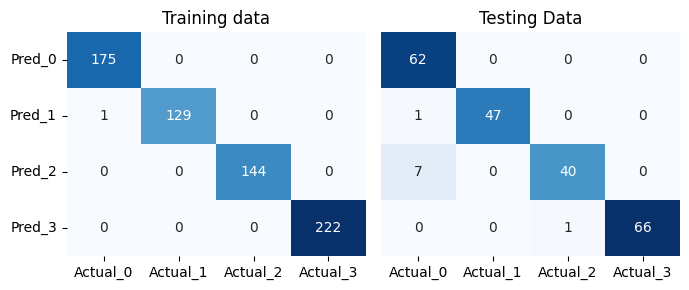

In [44]:
print_confusionMatrix(cnn_densenet, X_train_scaled, y_train_labeled, X_test_scaled, y_test_labeled)

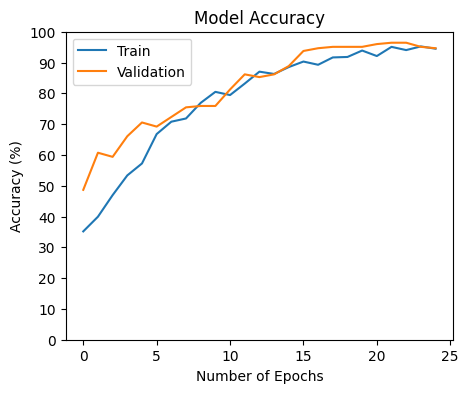

In [45]:
plot_history(history)

### Observations

- The DenseNet model is giving 94% accuracy on training data and 95% accuracy on tetsing data.
- This model is not overfitting, but this model is not able to predict class-2[Shine] images effectively as it has low Recall score for this class.

### GoogleNet

In [51]:
googlenet = InceptionV3(weights='imagenet', 
                        include_top=False, 
                        input_shape=(224, 224, 3))

for layer in googlenet.layers[:-10]:
    layer.trainable = False


model_googlenet = Sequential()
model_googlenet.add(googlenet)
model_googlenet.add(Flatten())
model_googlenet.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model_googlenet.add(Dropout(0.5))
model_googlenet.add(Dense(128, activation = 'relu'))
model_googlenet.add(Dropout(0.5))
model_googlenet.add(Dense(64, activation = 'relu'))
model_googlenet.add(Dense(64, activation = 'relu'))
model_googlenet.add(BatchNormalization())
model_googlenet.add(Dense(32, activation = 'relu'))
model_googlenet.add(Dense(4, activation = 'softmax'))

In [52]:
model_googlenet.compile(optimizer = Adam(learning_rate = 0.001),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

start_time = time.time()
history = model_googlenet.fit(X_train_scaled, y_train_labeled, epochs = 25, validation_data = (X_val_scaled, y_val_labeled), batch_size=32, shuffle = False)
end_time = time.time()
googlenet_time = end_time - start_time
model_googlenet.summary()

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1968 - loss: 1.8161 - val_accuracy: 0.4643 - val_loss: 1.3294
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3156 - loss: 1.4851 - val_accuracy: 0.3705 - val_loss: 1.3575
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4014 - loss: 1.3592 - val_accuracy: 0.4554 - val_loss: 1.2761
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4410 - loss: 1.2178 - val_accuracy: 0.5089 - val_loss: 1.1208
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5088 - loss: 1.1393 - val_accuracy: 0.3750 - val_loss: 1.2562
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4754 - loss: 1.1595 - val_accuracy: 0.5938 - val_loss: 1.1503
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5279 - loss: 1.0846 - val_accuracy: 0.7054 - val_loss: 0.9116
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5885 - loss: 0.9816 - val_accuracy: 0.7232 - va

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,558,286 (158.53 MB)

 Trainable params: 6,585,188 (25.12 MB)

 Non-trainable params: 21,802,720 (83.17 MB)

 Optimizer params: 13,170,378 (50.24 MB)

In [53]:
model_googlenet.evaluate(X_test_scaled, y_test_labeled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9168 - loss: 0.2494


[0.26773643493652344, 0.9151785969734192]

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 282ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        65
           1       1.00      0.95      0.97        55
           2       0.97      0.70      0.81        50
           3       0.90      1.00      0.95        54

    accuracy                           0.92       224
   macro avg       0.93      0.91      0.91       224
weighted avg       0.92      0.92      0.91       224



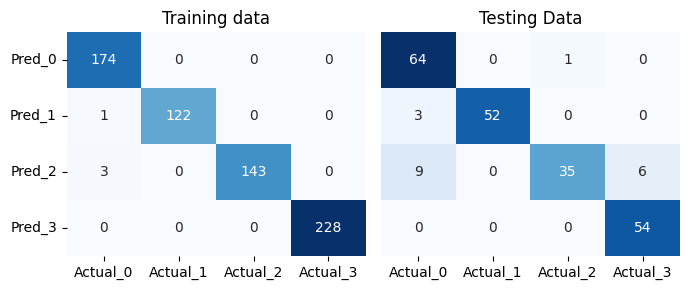

In [54]:
print_confusionMatrix(model_googlenet, X_train_scaled, y_train_labeled, X_test_scaled, y_test_labeled)

### Observations

- This model is giving a descent score but not able to predict class_2 images comparing with the other clases.

In [56]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in mobilenet.layers[:-10]:
    layer.trainable = False

model_mobilenet = Sequential()
model_mobilenet.add(mobilenet)
model_mobilenet.add(Flatten())
model_mobilenet.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_mobilenet.add(Dense(128, activation='relu'))
model_mobilenet.add(Dropout(0.5))
model_mobilenet.add(Dense(128, activation='relu'))
model_mobilenet.add(Dropout(0.5))
model_mobilenet.add(Dense(64, activation='relu'))
model_mobilenet.add(Dense(64, activation='relu'))
model_mobilenet.add(BatchNormalization())
model_mobilenet.add(Dense(32, activation='relu'))
model_mobilenet.add(Dense(32, activation='relu'))
model_mobilenet.add(Dense(4, activation='softmax'))  # Adjust the number of classes as per your dataset

In [59]:
model_mobilenet.compile(optimizer=SGD(learning_rate=0.001, momentum = 0.5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

start_time = time.time()
history = model_mobilenet.fit(X_train_scaled, y_train_labeled, epochs = 50, validation_data = (X_val_scaled, y_val_labeled), batch_size=32)
end_time = time.time()
mobilenet_time = end_time - start_time

model_mobilenet.summary()

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 427ms/step - accuracy: 0.2744 - loss: 1.6731 - val_accuracy: 0.2500 - val_loss: 1.3997
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3003 - loss: 1.5398 - val_accuracy: 0.2723 - val_loss: 1.3635
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2809 - loss: 1.4758 - val_accuracy: 0.2991 - val_loss: 1.3332
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2582 - loss: 1.4356 - val_accuracy: 0.3795 - val_loss: 1.3045
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3186 - loss: 1.3968 - val_accuracy: 0.4464 - val_loss: 1.2934
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3548 - loss: 1.3415 - val_accuracy: 0.4330 - val_loss: 1.2792
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3629 - loss: 1.3408 - val_accuracy: 0.4821 - val_loss: 1.2521
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4098 - loss: 1.2612 - val_accuracy: 0.5268 -

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,638,282 (116.88 MB)

 Trainable params: 14,498,756 (55.31 MB)

 Non-trainable params: 1,640,768 (6.26 MB)

 Optimizer params: 14,498,758 (55.31 MB)

In [60]:
model_mobilenet.evaluate(X_test_scaled, y_test_labeled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9080 - loss: 0.3070


[0.3400585949420929, 0.8883928656578064]

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        65
           1       0.98      0.98      0.98        55
           2       1.00      0.68      0.81        50
           3       0.71      1.00      0.83        54

    accuracy                           0.89       224
   macro avg       0.91      0.88      0.89       224
weighted avg       0.92      0.89      0.89       224



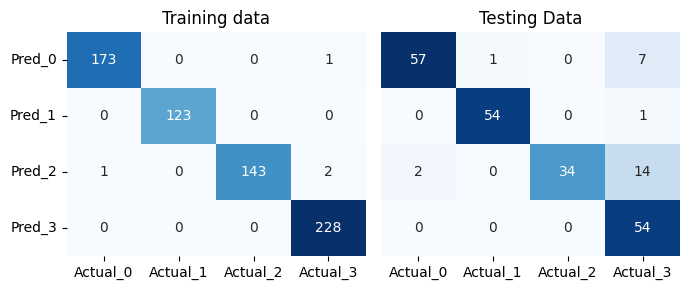

In [61]:
print_confusionMatrix(model_mobilenet, X_train_scaled, y_train_labeled, X_test_scaled, y_test_labeled)

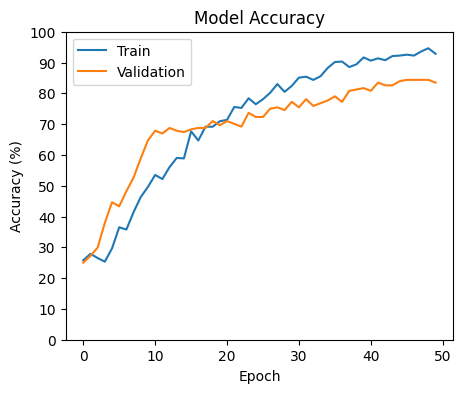

In [62]:
plot_history(history)

### Observations

- This mobilenet model is overfitting.
- Scores for class_2 images are vary low.

### ResNet

In [128]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in resnet.layers[:-5]:
    layer.trainable = False

model_resnet = Sequential()
model_resnet.add(resnet)
model_resnet.add(Flatten())
model_resnet.add(Dense(128, activation='relu'))
model_resnet.add(BatchNormalization())
model_resnet.add(Dense(64, activation='relu'))
model_resnet.add(Dense(32, activation='relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(Dense(32, activation='relu'))
model_resnet.add(Dense(4, activation='softmax'))  # Adjust the number of classes as per your dataset

In [129]:
model_resnet.compile(optimizer = SGD(learning_rate = 0.001, momentum = 0.9),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [130]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


start_time = time.time()
history = model_resnet.fit(X_train_scaled, y_train_labeled, epochs = 25, validation_data = (X_val_scaled, y_val_labeled), batch_size=32, shuffle = False)
end_time = time.time()
resnet_time = end_time - start_time

model_resnet.summary()

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 436ms/step - accuracy: 0.2724 - loss: 1.4619 - val_accuracy: 0.2455 - val_loss: 4.6714
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4089 - loss: 1.2709 - val_accuracy: 0.2455 - val_loss: 3.2562
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.5731 - loss: 1.1379 - val_accuracy: 0.2634 - val_loss: 3.5238
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6657 - loss: 1.0160 - val_accuracy: 0.2634 - val_loss: 2.9467
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7178 - loss: 0.8820 - val_accuracy: 0.2634 - val_loss: 4.2203
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7429 - loss: 0.7940 - val_accuracy: 0.1607 - val_loss: 3.1775
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8241 - loss: 0.6534 - val_accuracy: 0.1696 - val_loss: 2.8511
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8620 - loss: 0.5625 - val_accuracy: 0.1786 -

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_107         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,356,618 (192.10 MB)

 Trainable params: 13,911,684 (53.07 MB)

 Non-trainable params: 22,533,248 (85.96 MB)

 Optimizer params: 13,911,686 (53.07 MB)

In [131]:
model_resnet.evaluate(X_test_scaled, y_test_labeled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4646 - loss: 3.2650


[3.2903993129730225, 0.4642857015132904]

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.66      0.49      0.56        55
           2       0.32      1.00      0.49        50
           3       1.00      0.50      0.67        54

    accuracy                           0.46       224
   macro avg       0.49      0.50      0.43       224
weighted avg       0.47      0.46      0.41       224



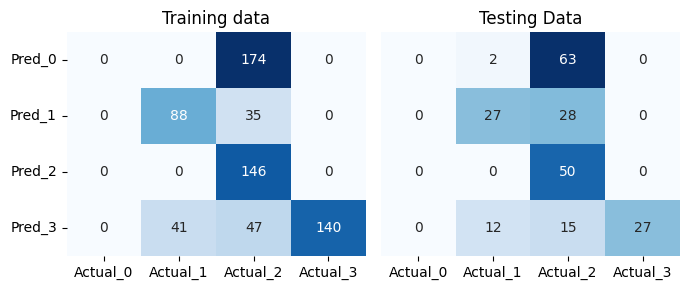

In [132]:
print_confusionMatrix(model_resnet, X_train_scaled, y_train_labeled, X_test_scaled, y_test_labeled)

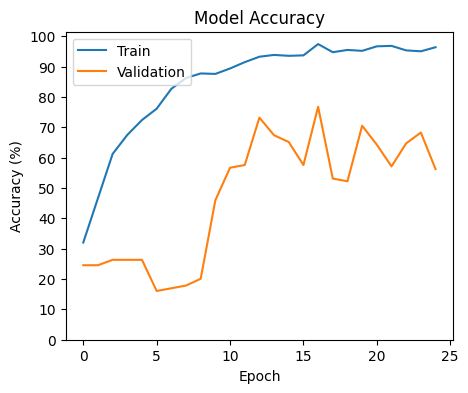

In [133]:
plot_history(history)

### Observations

- The Resnet model is overfitting and by looking at the graph it has a lot of fluctuations in the validation accuracies.
- This model is giving very low scores for most of the classes.

### EfficientNet

In [152]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


model_efficientnet = Sequential()
model_efficientnet.add(base_model)
model_efficientnet.add(Flatten())
model_efficientnet.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_efficientnet.add(Dense(128, activation='relu'))
model_efficientnet.add(Dropout(0.5),)
model_efficientnet.add(Dense(128, activation='relu'))
model_efficientnet.add(Dropout(0.5))
model_efficientnet.add(Dense(64, activation='relu'))
model_efficientnet.add(Dropout(0.5))
model_efficientnet.add(Dense(64, activation='relu'))
model_efficientnet.add(BatchNormalization())
model_efficientnet.add(Dense(128, activation='relu'))
model_efficientnet.add(Dense(64, activation='relu'))
model_efficientnet.add(Dense(32, activation='relu'))
model_efficientnet.add(Dense(32, activation='relu'))
model_efficientnet.add(Dense(4, activation='softmax'))

In [153]:
model_efficientnet.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [154]:
start_time = time.time()
history = model_efficientnet.fit(X_train_scaled, y_train_labeled, epochs = 60, validation_data = (X_val_scaled, y_val_labeled), batch_size=32, shuffle = False)
end_time = time.time()
eficientnet_time = end_time - start_time

model_efficientnet.summary()

Epoch 1/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.2951 - loss: 1.3759 - val_accuracy: 0.3304 - val_loss: 1.3595
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.4858 - loss: 1.0784 - val_accuracy: 0.2634 - val_loss: 1.4155
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.5654 - loss: 0.8570 - val_accuracy: 0.2634 - val_loss: 1.6866
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.5843 - loss: 0.7807 - val_accuracy: 0.1607 - val_loss: 1.9233
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.7249 - loss: 0.6417 - val_accuracy: 0.1607 - val_loss: 2.3660
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.8010 - loss: 0.4651 - val_accuracy: 0.2455 - val_loss: 2.5159
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.8877 - loss: 0.3497 - val_accuracy: 0.1786 - val_loss: 2.5347
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.8804 - loss: 0.3838 - val_accuracy: 0.2

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_30 (Flatten)            │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 256)            │    16,056,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_188 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,479,913 (230.71 MB)

 Trainable params: 20,145,920 (76.85 MB)

 Non-trainable params: 42,151 (164.66 KB)

 Optimizer params: 40,291,842 (153.70 MB)

In [155]:
model_efficientnet.evaluate(X_test_scaled, y_test_labeled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9312 - loss: 0.4807


[0.4211994707584381, 0.9330357313156128]

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        65
           1       0.95      0.96      0.95        55
           2       0.90      0.92      0.91        50
           3       1.00      0.91      0.95        54

    accuracy                           0.93       224
   macro avg       0.94      0.93      0.93       224
weighted avg       0.94      0.93      0.93       224



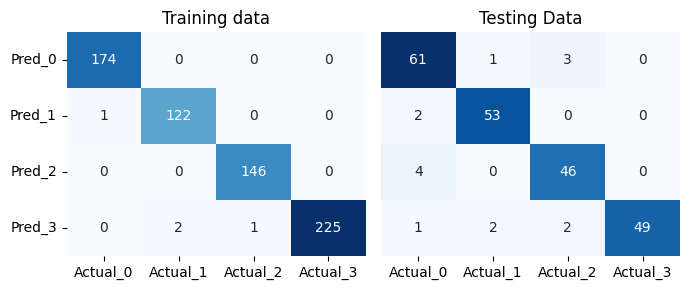

In [156]:
print_confusionMatrix(model_efficientnet, X_train_scaled, y_train_labeled, X_test_scaled, y_test_labeled)

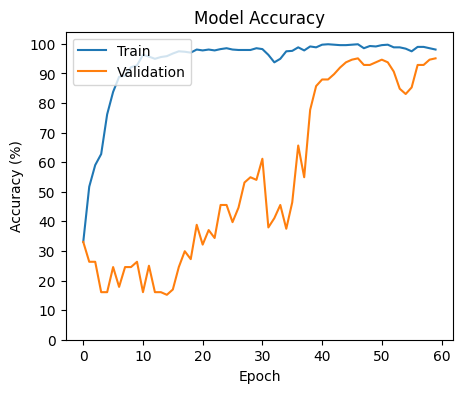

In [157]:
plot_history(history)

- This model is giving good and generalized accuracies but the graph for the accuries of traing and validation shows that the testing  scores are fluctuating a lot.
- this model might not give good scores all the time.

#### Creating a DataFrame and storing all the models test scores[Accuracy, Precision, Recall and F1_score]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score as sklearn_f1_score

model_scores_df = pd.DataFrame(index=['Accuracy', 'Recall', 'Precision', 'F1_score', 'Time(Sec)'])

def scores(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)  
    y_pred = np.argmax(y_pred_prob, axis=1) 
    y_true = np.argmax(y_test, axis=1)

    Accuracy = accuracy_score(y_true, y_pred)
    Precision = precision_score(y_true, y_pred, average='macro')
    Recall = recall_score(y_true, y_pred, average='macro')
    F1_score = sklearn_f1_score(y_true, y_pred, average='macro')
    return Accuracy, Precision, Recall, F1_score

In [ ]:
accuracy, precision, recall, f1 = scores(cnn, X_test_scaled, y_test_labeled)
model_scores_df['CNN'] = [accuracy, precision, recall, f1, cnn_time]

accuracy, precision, recall, f1 = scores(vgg_model, X_test_scaled, y_test_labeled)
model_scores_df['VGG_1'] = [accuracy, precision, recall, f1, vgg1_time]

accuracy, precision, recall, f1 = scores(vgg_model2, X_test_scaled, y_test_labeled)
model_scores_df['VGG_2'] = [accuracy, precision, recall, f1, vgg2_time]

accuracy, precision, recall, f1 = scores(cnn_densenet, X_test_scaled, y_test_labeled)
model_scores_df['DenseNet'] = [accuracy, precision, recall, f1, dense_time]

accuracy, precision, recall, f1 = scores(model_googlenet, X_test_scaled, y_test_labeled)
model_scores_df['GoogleNet'] = [accuracy, precision, recall, f1, googlenet_time]

accuracy, precision, recall, f1 = scores(model_mobilenet, X_test_scaled, y_test_labeled)
model_scores_df['MobileNet'] = [accuracy, precision, recall, f1, mobilenet_time]

accuracy, precision, recall, f1 = scores(model_resnet, X_test_scaled, y_test_labeled)
model_scores_df['ResNet'] = [accuracy, precision, recall, f1, resnet_time]

accuracy, precision, recall, f1 = scores(model_efficientnet, X_test_scaled, y_test_labeled)
model_scores_df['EfficientNet'] = [accuracy, precision, recall, f1, efficientnet_time]

#### Printing all scores and time for each model

In [4]:
model_scores_df.T

,Accuracy,Recall,Precision,F1_score,Time(Sec)
CNN,0.750000,0.783055,0.738572,0.723629,128.150036
VGG_1,0.955357,0.952896,0.954831,0.953603,58.340063
VGG_2,0.955357,0.955141,0.953766,0.954411,115.535722
DenseNet,0.959821,0.965331,0.953826,0.957610,115.978587
GoogleNet,0.946429,0.944842,0.946905,0.945281,81.516878
MobileNet,0.901786,0.916994,0.898722,0.902815,63.249375
ResNet,0.406250,0.565278,0.437811,0.375893,85.158074
EfficientNet,0.968750,0.966525,0.969200,0.967496,348.337975


### Conclusions

#### Models with good scores

- From the above dataframe, VGG models, DenseNet model and EfficientNet model are giving good scores for the testing data.
- googlenet also giving considerable accuracies.

#### Best Model for classiifcation

- Even though, DenseNet and EfficientNet are giving best scores for the testing data, they are not able to predict some classses.
- But VGG model_1 and model_2 are giving good scores for individual classes.
- VGG_2 is not overfitted and giving good Precision,Recall, Accuracy and F1_scores.
- So, VGG_2 will be the best model among all for this weather classification dataset.